# 蛋白质-配体相互作用

## 本教程目标

在本教程中，我们重点关注蛋白质-配体相互作用。理解这种驱动分子识别的相互作用在药物设计中是基础性的。

为此，我们使用两个 Python 工具：第一个称为蛋白质-配体相互作用分析器，或 [PLIP](https://doi.org/10.1093/nar/gkv315)，用于深入了解任何样本复合物的蛋白质-配体相互作用；第二个是 [NGLView](https://doi.org/10.1093/bioinformatics/btx789)，用于以 3D 方式可视化这些相互作用。

### 理论_部分内容

- 蛋白质-配体相互作用
- PLIP：蛋白质-配体相互作用分析器
    - 网络服务
    - 算法
- 可视化：复合物和相互作用

### 实践_部分内容

- PDB 复合物：EGFR 示例
- 使用 PLIP 分析蛋白质-配体相互作用
- 相互作用类型表格
- 使用 NGLView 可视化
    - 相互作用分析

### 参考文献

- 蛋白质-配体相互作用综述（[_Int. J. Mol. Sci._ (2016), __17__, 144](https://www.mdpi.com/1422-0067/17/2/144)）
- PDB 数据库中非共价相互作用的系统分析（[_M. Med. Chem. Commun._ (2017), __8__, 1970-1981](https://pubs.rsc.org/en/content/articlelanding/2017/md/c7md00381a#!divAbstract)）
- 关于蛋白质-配体相互作用如何是药物作用关键的章节（载于 [Klebe G. (eds) Drug Design. Springer, Berlin, Heidelberg.](https://link.springer.com/referenceworkentry/10.1007%2F978-3-642-17907-5_4)）
* 工具
    * NGLView，Jupyter 笔记本的交互式分子可视化器（[_Bioinformatics_ (2018), __34__, 1241–124](https://doi.org/10.1093/bioinformatics/btx789)）
    * PLIP，蛋白质-配体相互作用分析器（[_Nucl. Acids Res._ (2015), __43__, W1, W443-W447](https://academic.oup.com/nar/article/43/W1/W443/2467865)）

## 理论

### 蛋白质-配体相互作用

配体结合主要由配体和蛋白质口袋表面或蛋白质-蛋白质界面之间的非共价相互作用支配。这个过程是静电和形状互补性、诱导拟合、去溶剂化过程等的功能。

文献中的一些引述：

改编自 [José L. Medina-Franco, Oscar Méndez-Lucio, Karina Martinez-Mayorga](https://www.sciencedirect.com/science/article/pii/S1876162314000029)：

> 理解蛋白质-配体相互作用（PLIs）和蛋白质-蛋白质相互作用（PPIs）是分子识别的核心，并在许多科学领域具有基础作用。PLIs 和 PPIs 在药物发现中具有广泛的实际应用领域，包括但不限于分子对接、基于结构的设计、分子片段、小分子和其他类型化合物的虚拟筛选、复合物聚类和活性悬崖的结构解释等。

这些相互作用可以通过多种方式合理化，这为对接解决方案的系统分析打开了大门。

![蛋白质配体非共价相互作用](images/protein_ligand_non_covalent.gif)

_图 1_：**非共价相互作用的频率。** 从 PDB 数据库复合物中提取的 750,873 个配体-蛋白质原子对中，100 个最频繁的对可以分组为七种相互作用类型，如图所示（取自 de Freitas 和 Schapira 的论文，[PDB 中原子蛋白质-配体相互作用的系统分析](https://doi.org/10.1039/C7MD00381A)，2017）。

有几个程序可以自动评估蛋白质-配体相互作用。

例如，激酶-配体相互作用指纹和结构数据库（[KLIFS](https://klifs.net/)）是一个以激酶为中心的工具，具有免费可用的网络服务。更多细节可以在**教程 T012**中找到："从 KLIFS 获取数据"。

### PLIP：蛋白质-配体相互作用分析器

对于更一般的蛋白质集合，[PLIP](https://plip.biotec.tu-dresden.de/plip-web/plip/index) 也因其公开可用的网络服务器和免费使用的 Python 库而受欢迎。

#### PLIP：网络服务

PLIP 网络服务是一个免费可用的工具，可以从任何 PDB 结构中展示蛋白质-配体相互作用，如下图 2 所示。

![芳香相互作用](images/3POZ_PLIP.png)

_图 2_：**PLIP 网络服务生成的蛋白质-配体相互作用可视化。** 示例显示 EGFR 激酶复合物，相关 PDB ID [3POZ](https://www.rcsb.org/structure/3POZ)。该图是[网络服务](https://projects.biotec.tu-dresden.de/plip-web/plip)结果的快照，显示：

- 蛋白质和配体的 3D 图以及检测到的不同相互作用类型（参见右侧图例）。

- 描述蛋白质和配体原子之间疏水相互作用的示例表格。

#### PLIP：算法

对于每个结合位点，PLIP 算法只考虑位于特定距离截止范围内的蛋白质和配体原子。一旦识别出潜在相互作用的蛋白质和配体原子，就可以检测非共价相互作用，例如：

- 疏水相互作用
- 氢键
- 芳香堆积
- π-阳离子相互作用
- 盐桥
- 水桥氢键
- 卤素键

它们使用几何规则定义，例如距离和角度阈值。

伴随手稿（[_Nucl. Acids Res._ (2015), __43__, W1, W443-W447](https://academic.oup.com/nar/article/43/W1/W443/2467865)）的[补充信息](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489249/bin/supp_gkv315_nar-00254-web-b-2015-File003.pdf)详细描述了结合位点检测和蛋白质-配体相互作用，请参见下面的 PDF 文档。

In [1]:
from teachopencadd.utils import show_pdf

In [2]:
pdf = (
    "https://www.ncbi.nlm.nih.gov/"
    "pmc/articles/PMC4489249/bin/supp_gkv315_nar-00254-web-b-2015-File003.pdf"
)
show_pdf(pdf)

### 可视化：复合物和相互作用

我们将使用 `nglview` 进行可视化。它是一个可以在 Jupyter 笔记本上运行的[基于网络的分子查看器](https://doi.org/10.1093/bioinformatics/btx789)。我们将首先以基本方式使用它来可视化感兴趣的复合物。然后，我们将利用 `ipywidgets` 布局来可视化蛋白质-配体相互作用。

更多细节可以在**教程 T017**中找到关于高级 NGLview 和 widget 使用的部分。

## 实践

In [3]:
# Import libraries
from pathlib import Path
import time
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import nglview as nv
import openbabel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from plip.structure.preparation import PDBComplex
from plip.exchange.report import BindingSiteReport

from opencadd.structure.core import Structure

In [4]:
# Absolute path
HERE = Path(_dh[-1])
DATA = HERE / "data"

### PDB 复合物：EGFR 示例

作为本笔记的测试用例，我们选择 EGFR 激酶。考虑的 PDB 结构由 ID [3POZ](http://dx.doi.org/10.2210/pdb3poz/pdb) 给出。让我们使用 `nglview` 在笔记单元格中可视化结构。

_注意_：可以通过调整下面的单元格中的 PDB ID 来轻松更改复合物。

In [5]:
pdb_id = "3poz"

我们现在使用 `opencadd.structure.superposition` 从 PDB 获取 PDB 结构文件。更多细节可以在**教程 T008**中找到关于蛋白质数据获取的部分。

In [6]:
pdb_file = Structure.from_pdbid(pdb_id)
# Download it to file for later use
pdb_file.write(DATA / f"{pdb_id}.pdb")

基于 PDB ID 显示复合物

In [7]:
ngl_viewer = nv.show_pdbid(pdb_id)
# add the ligands
ngl_viewer.add_representation(repr_type="ball+stick", selection="hetero and not water")
# center view on binding site
ngl_viewer.center("ligand")
ngl_viewer

NGLWidget()

In [8]:
# render a static image
ngl_viewer.render_image(trim=True, factor=2);

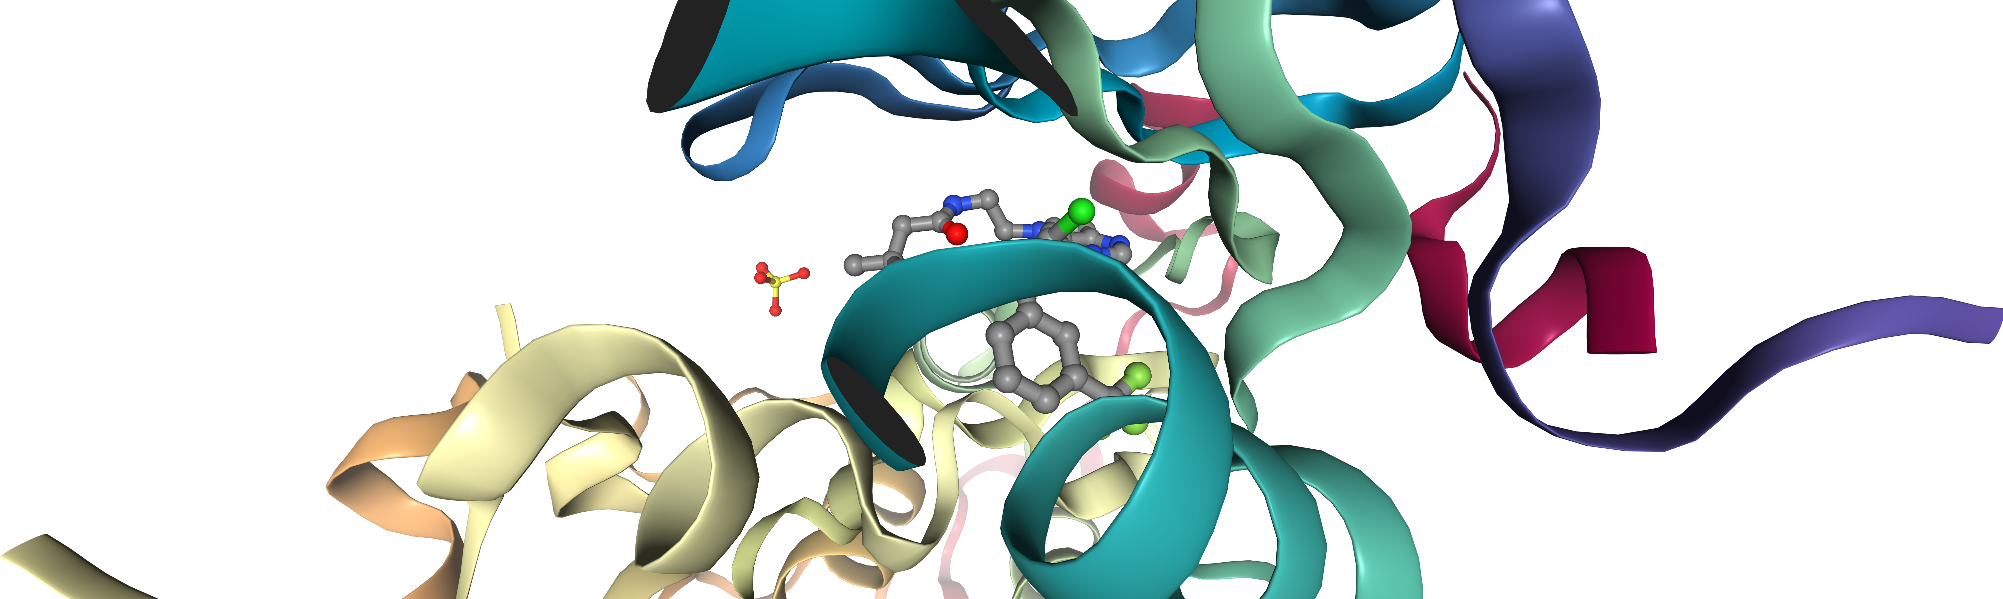

In [9]:
ngl_viewer._display_image()

### 使用 PLIP 分析蛋白质-配体相互作用

PLIP 提供[网络服务器](https://projects.biotec.tu-dresden.de/plip-web/plip)进行自动分析，但遗憾的是没有 API。我们可以尝试像使用标准网络 UI 一样使用 HTML 表单，但由于库本身是 Python-3 就绪的并且可以通过 `pip` 非常容易安装，为了简单起见，我们可以在本地使用它。

PLIP 将 PDB 文件作为输入，因此我们可以将 PDB 文件传递给 PLIP 并让它发挥其魔力。`BindingSiteReport` 类处理 `PDBComplex` 中每个检测到的结合位点，并创建一个包含我们感兴趣的（八个）字段的对象，即

- 疏水相互作用：`hydrophobic`
- 氢键：`hbond`
- 水桥：`waterbridge`
- 盐桥：`saltbridge`
- π-堆积（平行和垂直）：`pistacking`
- π-阳离子：`pication`
- 卤素键：`halogen`
- 金属络合：`metal`

这些字段分为 `<field>_features`（包含列名）和 `<field>_info`（包含实际记录）。如果我们迭代对象，使用 `getattr()` 检索正确的属性名称，我们可以组成一个字典，可以传递给 `pandas.DataFrame` 以获得良好的概览。

这个字典由两个层次组成：

- 第一层是检测到的结合位点。
- 对于每个结合位点，我们还有一个子字典，包含八个列表，每个列表对应一个特定的相互作用。
    * 每个列表将在第一行包含列名，如果可用，则在接下来的行中包含数据。

In [10]:
def retrieve_plip_interactions(pdb_file):
    """
    Retrieves the interactions from PLIP.

    Parameters
    ----------
    pdb_file :
        The PDB file of the complex.

    Returns
    -------
    dict :
        A dictionary of the binding sites and the interactions.
    """
    protlig = PDBComplex()
    protlig.load_pdb(pdb_file)  # load the pdb file
    for ligand in protlig.ligands:
        protlig.characterize_complex(ligand)  # find ligands and analyze interactions
    sites = {}
    # loop over binding sites
    for key, site in sorted(protlig.interaction_sets.items()):
        binding_site = BindingSiteReport(site)  # collect data about interactions
        # tuples of *_features and *_info will be converted to pandas DataFrame
        keys = (
            "hydrophobic",
            "hbond",
            "waterbridge",
            "saltbridge",
            "pistacking",
            "pication",
            "halogen",
            "metal",
        )
        # interactions is a dictionary which contains relevant information for each
        # of the possible interactions: hydrophobic, hbond, etc. in the considered
        # binding site. Each interaction contains a list with
        # 1. the features of that interaction, e.g. for hydrophobic:
        # ('RESNR', 'RESTYPE', ..., 'LIGCOO', 'PROTCOO')
        # 2. information for each of these features, e.g. for hydrophobic
        # (residue nb, residue type,..., ligand atom 3D coord., protein atom 3D coord.)
        interactions = {
            k: [getattr(binding_site, k + "_features")] + getattr(binding_site, k + "_info")
            for k in keys
        }
        sites[key] = interactions
    return sites

我们为感兴趣的复合物创建字典：

In [11]:
interactions_by_site = retrieve_plip_interactions(f"{DATA}/{pdb_id}.pdb")

让我们看看检测到多少个结合位点：

In [12]:
print(
    f"Number of binding sites detected in {pdb_id} : "
    f"{len(interactions_by_site)}\n"
    f"with {interactions_by_site.keys()}"
)
# NBVAL_CHECK_OUTPUT

Number of binding sites detected in 3poz : 4
with dict_keys(['03P:X:1023', 'SO4:X:1', 'SO4:X:2', 'SO4:X:3'])


在这种情况下，包含配体 **03P** 的第一个结合位点将被进一步研究。

In [13]:
index_of_selected_site = 0
selected_site = list(interactions_by_site.keys())[index_of_selected_site]
print(selected_site)

03P:X:1023


### 相互作用类型表格

我们可以为结合位点和特定相互作用类型构建一个 `pandas.DataFrame`。

In [14]:
def create_df_from_binding_site(selected_site_interactions, interaction_type="hbond"):
    """
    Creates a data frame from a binding site and interaction type.

    Parameters
    ----------
    selected_site_interactions : dict
        Precaluclated interactions from PLIP for the selected site
    interaction_type : str
        The interaction type of interest (default set to hydrogen bond).

    Returns
    -------
    pd.DataFrame :
        DataFrame with information retrieved from PLIP.
    """

    # check if interaction type is valid:
    valid_types = [
        "hydrophobic",
        "hbond",
        "waterbridge",
        "saltbridge",
        "pistacking",
        "pication",
        "halogen",
        "metal",
    ]

    if interaction_type not in valid_types:
        print("!!! Wrong interaction type specified. Hbond is chosen by default!!!\n")
        interaction_type = "hbond"

    df = pd.DataFrame.from_records(
        # data is stored AFTER the column names
        selected_site_interactions[interaction_type][1:],
        # column names are always the first element
        columns=selected_site_interactions[interaction_type][0],
    )
    return df

**疏水相互作用**

在下一个单元格中，我们显示选定结合位点的疏水相互作用。

In [15]:
create_df_from_binding_site(interactions_by_site[selected_site], interaction_type="hydrophobic")

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  DIST   
0    745     LYS        X       1023         03P            X  3.91  \
1    788     LEU        X       1023         03P            X  3.89   
2    788     LEU        X       1023         03P            X  3.66   
3    854     THR        X       1023         03P            X  3.82   
4    858     LEU        X       1023         03P            X  3.93   
5    745     LYS        X       1023         03P            X  3.53   
6    790     THR        X       1023         03P            X  3.48   

   LIGCARBONIDX  PROTCARBONIDX                    LIGCOO   
0          2398            320   (18.317, 32.25, 10.052)  \
1          2396            593   (15.676, 34.766, 8.319)   
2          2383            595   (18.404, 30.743, 6.486)   
3          2382           1138  (18.135, 32.543, 11.422)   
4          2383           1167   (18.404, 30.743, 6.486)   
5          2396            318   (15.676, 34.766, 8.319)   
6          2396            611   (15.676, 34.766, 8.319)   

                    PROTCOO  
0   (20.469, 34.989, 8.267)  
1   (16.314, 35.031, 4.495)  
2   (18.317, 33.573, 4.169)  
3  (17.798, 28.992, 12.797)  
4   (22.084, 30.736, 5.093)  
5   (18.634, 36.648, 7.936)  
6   (12.875, 33.449, 9.914)

如您所注意，此表与笔记_理论_部分中的图匹配。

**氢键相互作用**

如果对氢键相互作用感兴趣，可以按如下方式生成表格：

In [16]:
create_df_from_binding_site(interactions_by_site[selected_site], interaction_type="hbond")

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  SIDECHAIN   
0    793     MET        X       1023         03P            X      False  \

  DIST_H-A DIST_D-A DON_ANGLE  PROTISDON  DONORIDX DONORTYPE  ACCEPTORIDX   
0     2.01     2.96    163.57       True       629       Nam         2404  \

  ACCEPTORTYPE                    LIGCOO                   PROTCOO  
0           N2  (13.371, 34.064, 15.005)  (10.667, 33.654, 16.145)

**卤素相互作用**

让我们也看看卤素相互作用：

In [17]:
create_df_from_binding_site(interactions_by_site[selected_site], interaction_type="halogen")

RESNR RESTYPE RESCHAIN  RESNR_LIG RESTYPE_LIG RESCHAIN_LIG  SIDECHAIN   
0    766     MET        X       1023         03P            X      False  \
1    790     THR        X       1023         03P            X       True   

   DIST DON_ANGLE ACC_ANGLE  DON_IDX DONORTYPE  ACC_IDX ACCEPTORTYPE   
0  3.60    167.05    118.86     2389         F      431           O2  \
1  3.47    171.27    103.84     2388         F      610           O3   

                    LIGCOO                  PROTCOO  
0  (12.164, 26.835, 3.777)  (14.283, 28.118, 6.395)  
1  (11.467, 31.629, 9.124)  (13.867, 29.356, 8.056)

### 使用 NGLView 可视化

现在，让我们尝试在 NGL 查看器中表示这些相互作用。我们可以在相互作用点（`pandas.DataFrame` 中的 `LIGCOO` 和 `PROTCOO`）之间绘制圆柱体，并按照 `color_map` 中的颜色代码进行着色，该图使用 RGB 元组。

In [18]:
color_map = {
    "hydrophobic": [0.90, 0.10, 0.29],
    "hbond": [0.26, 0.83, 0.96],
    "waterbridge": [1.00, 0.88, 0.10],
    "saltbridge": [0.67, 1.00, 0.76],
    "pistacking": [0.75, 0.94, 0.27],
    "pication": [0.27, 0.60, 0.56],
    "halogen": [0.94, 0.20, 0.90],
    "metal": [0.90, 0.75, 1.00],
}

让我们看看这些 RGB 颜色对应什么：

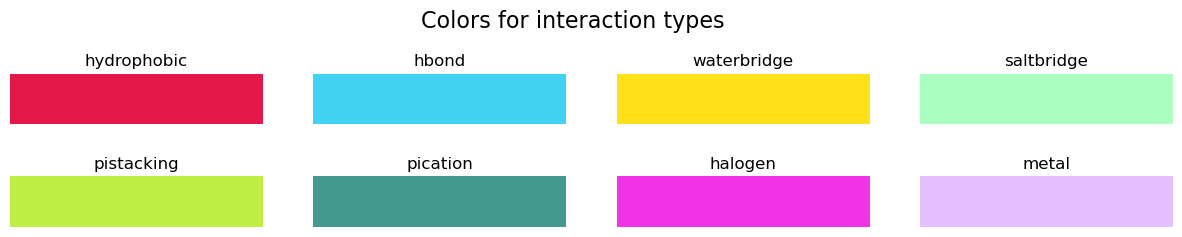

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 2))
plt.subplots_adjust(hspace=1)
fig.suptitle("Colors for interaction types", size=16, y=1.2)

for ax, (interaction, color) in zip(fig.axes, color_map.items()):
    ax.imshow(np.zeros((1, 5)), cmap=colors.ListedColormap(color_map[interaction]))
    ax.set_title(interaction, loc="center")
    ax.set_axis_off()
plt.show()

定义一个辅助函数来显示相互作用。

In [20]:
def show_interactions_3d(
    pdb_id, selected_site_interactions, highlight_interaction_colors=color_map
):
    """
    3D visualization of protein-ligand interactions.

    Parameters
    ----------
    pdb_id : str
        The pdb ID of interest.
    selected_site_interactions : dict
        Precaluclated interactions from PLIP for the selected site
    highlight_interaction_colors : dict
        The colors used to highlight the different interaction types.

    Returns
    -------
    NGL viewer with explicit interactions given by PLIP.
    """

    # Create NGLviewer
    viewer = nv.NGLWidget(height="600px", default=True, gui=True)
    # Add protein
    prot_component = viewer.add_pdbid(pdb_id)
    # Add the ligands
    viewer.add_representation(repr_type="ball+stick", selection="hetero and not water")

    interacting_residues = []
    for interaction_type, interaction_list in selected_site_interactions.items():
        color = highlight_interaction_colors[interaction_type]
        if len(interaction_list) == 1:
            continue
        df_interactions = pd.DataFrame.from_records(
            interaction_list[1:], columns=interaction_list[0]
        )
        for _, interaction in df_interactions.iterrows():
            name = interaction_type
            # add cylinder between ligand and protein coordinate
            viewer.shape.add_cylinder(
                interaction["LIGCOO"],
                interaction["PROTCOO"],
                color,
                [0.1],
                name,
            )
            interacting_residues.append(interaction["RESNR"])
    # Display interacting residues
    res_sele = " or ".join([f"({r} and not _H)" for r in interacting_residues])
    res_sele_nc = " or ".join([f"({r} and ((_O) or (_N) or (_S)))" for r in interacting_residues])
    prot_component.add_ball_and_stick(sele=res_sele, colorScheme="chainindex", aspectRatio=1.5)
    prot_component.add_ball_and_stick(sele=res_sele_nc, colorScheme="element", aspectRatio=1.5)
    # Center on ligand
    viewer.center("ligand")
    return viewer

In [21]:
viewer_3d = show_interactions_3d(pdb_id, interactions_by_site[selected_site])
viewer_3d

NGLWidget()

In [22]:
viewer_3d.render_image(trim=True, factor=2, transparent=True);

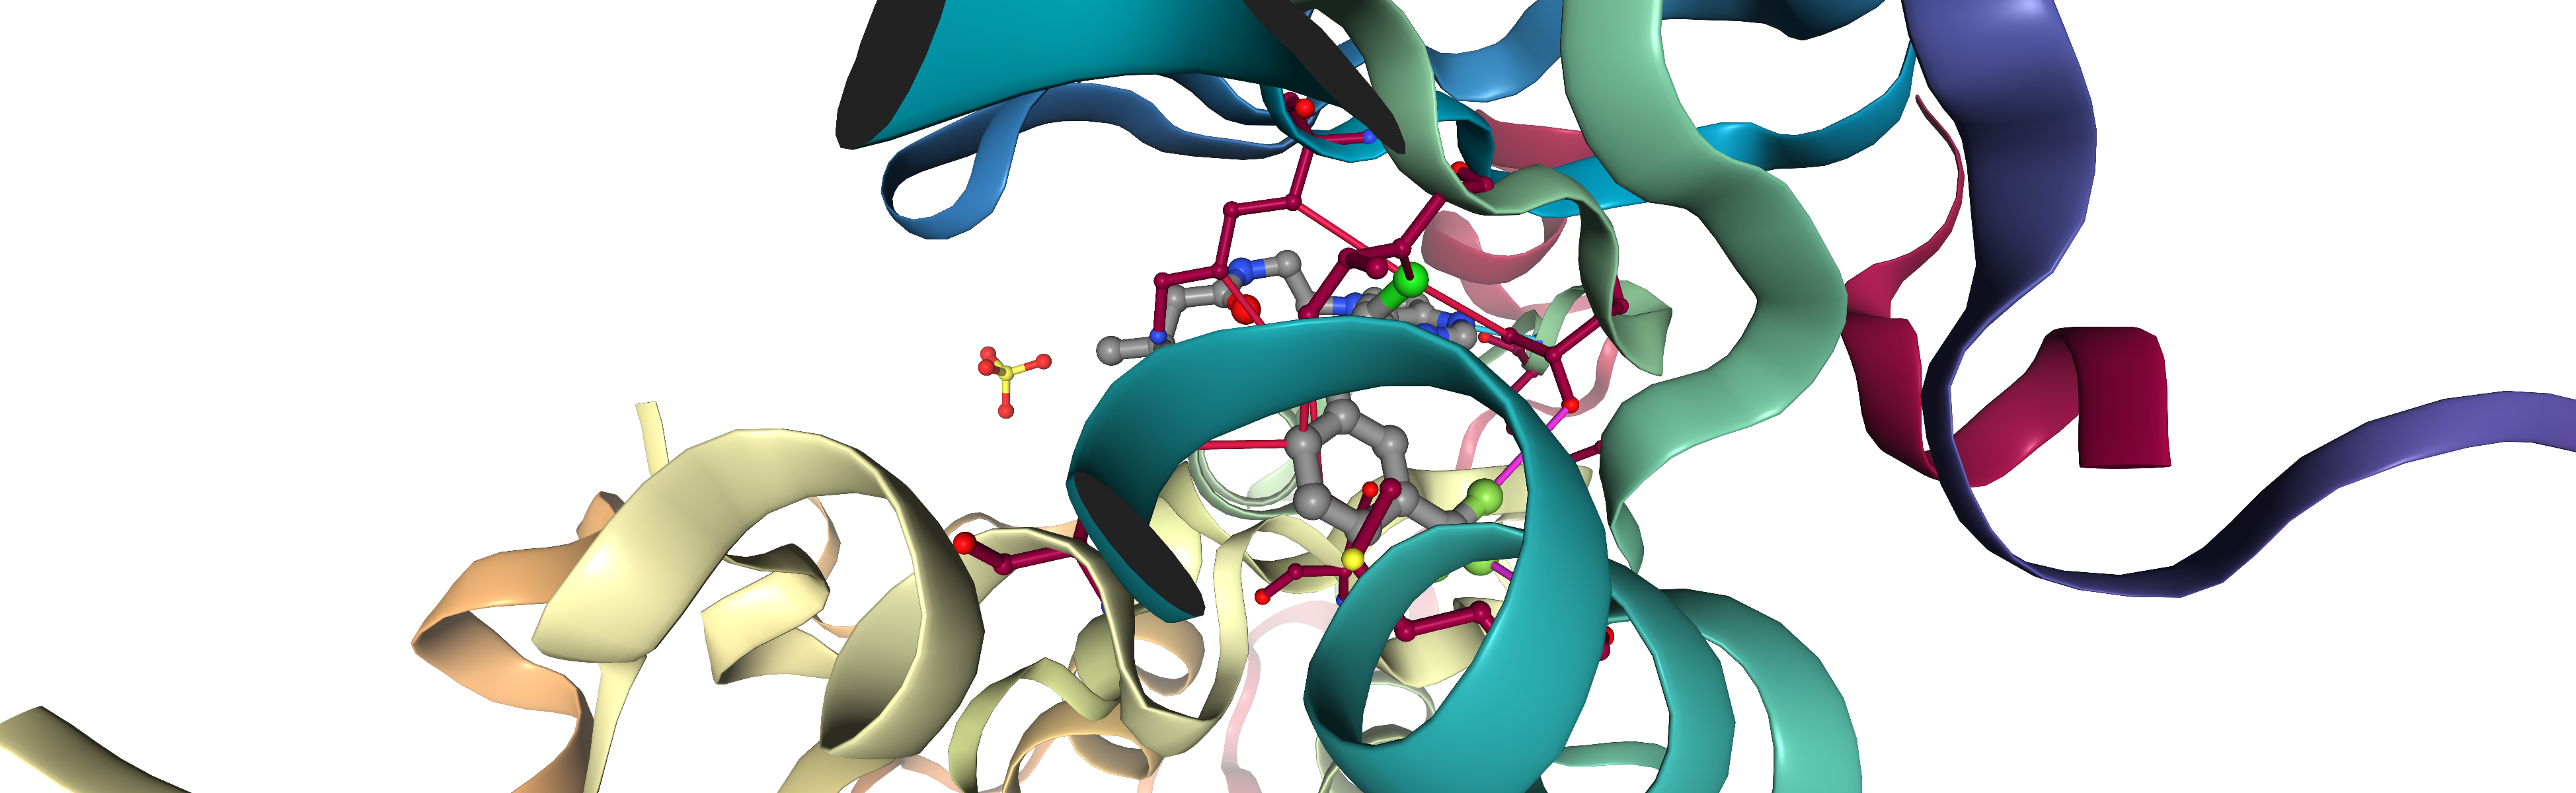

In [24]:
viewer_3d._display_image()

#### 相互作用分析

正如我们在 NGL 查看器中所看到的，PLIP 成功地识别了我们的激酶示例（3poz）中结合位点蛋白质和配体之间的不同相互作用：

- 与甲硫氨酸残基 MET793 的典型铰链氢键结合。
- 与以下残基的疏水相互作用： 
    - LYS745
    - LEU788
    - THR790
    - THR854
    - LEU858  
- 与残基的卤素相互作用：
    - MET766
    - LEU788
    - THR790

注意，例如铰链相互作用在 KLIFS 中同样被识别，参见 [3poz KLIFS 指纹](https://klifs.net/details.php?structure_id=7308)，而 PLIP 识别的疏水相互作用只是 KLIFS 中相互作用的子集。卤素相互作用在 KLIFS 中没有明确注释。

NGLview 中所有识别的相互作用确实对应于上面生成的相互作用表格。

## 讨论

在本教程中，我们学习了蛋白质-配体相互作用，更具体地说是在蛋白质-配体相互作用分析器（PLIP）的背景下。我们创建了一个 DataFrame 来在表格中描述相互作用。此外，我们利用 NGL 查看器在 3D 中可视化这些相互作用，这需要大量的网络技术，主要基于 NGL 查看器本身和 `ipywidgets` 布局。

## 测验

- 某些相互作用是否看起来比其他相互作用更重要？
- 疏水相互作用和氢键之间的主要区别是什么？它们有何相似之处？
- 使用 PLIP 而不是 KLIFS 可能有什么显著优势？